## 1. Train Test Split

- Import data

In [79]:
%store -r df

- It’s crucial to ensure that the train-test split respects the temporal and hierarchical structure of the data. Simply shuffling rows randomly could lead to data leakage  or break the natural grouping of data by country and time

- In that case I'll use a temporal split:
    - Use data from earlier years (2000–2010) for training.
    - Reserve later years (2011–2015) for testing.
     

In [80]:
train = df[df['Year'] <= 2010]
test = df[df['Year'] > 2010]

- Prevents future data from leaking into the training set.
- Mimics real-world use cases where predictions are made for future periods.
     

In [81]:
print(f'Test data shape:{test.shape}')

Test data shape:(925, 23)


In [82]:
print(f'Train data shape: {train.shape}')

Train data shape: (2013, 23)


- Train Test Split

In [83]:
# For training
X_train = train.drop(['Country', 'Life expectancy '], axis=1)
y_train = train['Life expectancy ']

In [84]:
# For the test set
X_test = test.drop(['Country', 'Life expectancy '], axis=1)
y_test = test['Life expectancy ']

## 2. Training

## a. Linear Regression

**i) Import libraries**

In [85]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

**ii) Reinitialise LR model**

In [86]:
model_LR = LinearRegression()

**iv) Fit model - LR**

In [87]:
model_LR.fit(X_train, y_train)

LinearRegression()

**v) Predict**

In [88]:
y_pred_train_lr = model_LR.predict(X_train)
y_pred_test_lr = model_LR.predict(X_test)

**vi) Evaluate Model - LR**

**1. Train Metrics**

In [89]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [90]:
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)

print(f"Train MSE: {mse_train_lr:.4f}")
print(f"Train MAE: {mae_train_lr:.4f}")
print(f"Train R² Score: {r2_train_lr:.4f}")

Train MSE: 14.8966
Train MAE: 2.9072
Train R² Score: 0.8455


> **Train MSE**: Before transformation is 1**5.4997**, After transformation: **15.3956**, After scaling: **13.8513**, After temporal split: **14.8966**

> **Train MSE**: After scaling: Train MAE: **2.7678**, After temporal split: Train MAE: **2.9072**

> **R Squared**: Before transformation: Train R² Score: **0.8304**,After transformation: Train R² Score: **0.8304**,After scaling: Train R² Score: **0.8484**,After Temporal split: **0.8455**.

**2. Test Metrics**

In [91]:
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f"Test MSE: {mse_test_lr:.4f}")
print(f"Test MAE: {mae_test_lr:.4f}")
print(f"Test R² Score: {r2_test_lr:.4f}")

Test MSE: 10.8894
Test MAE: 2.5022
Test R² Score: 0.8482


> **Test MSE**: Before transformation is **14.2255**, After transformation: **13.2045**, After scaling: **12.0188**, After temporal split: **10.8894**

> **Test MAE**: After scaling Test MAE: **2.5973**, After temporal split: Test MAE: **2.5022**

> **R Squared**: Before transformation: Test R² Score: **0.8359**, After transformation: Test R² Score: **0.8359**, After scaling: Test R² Score: **0.8613**, After Temporal split: **0.8482**

**3. Residuals**

**4. Cross Validation**

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean R²:", scores.mean(), "Std Dev:", scores.std())

Cross-validation scores: [0.86699271 0.77272679 0.76808727 0.8396307  0.84229342]
Mean R²: 0.8179461769631976 Std Dev: 0.03999818416907857


## b. Random Forest

**i) Import RFR**

In [93]:
from sklearn.ensemble import RandomForestRegressor

**ii) Reinitialize model**

In [94]:
rf = RandomForestRegressor()

**iii) Fit model - RF**

In [95]:
rf.fit(X_train, y_train)

RandomForestRegressor()

**iv) Predict**

In [96]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

**v) Evaluate Model - RF**

**1. Train Metrics**

In [97]:
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

print(f"Train MSE: {mse_train_rf:.4f}")
print(f"Train MAE: {mae_train_rf:.4f}")
print(f"Train R² Score: {r2_train_rf:.4f}")

Train MSE: 0.4734
Train MAE: 0.4181
Train R² Score: 0.9951


> **Train MSE:** Before Temporal split: Train MSE: **0.5284**, After Temporal split: Train MSE: **0.4812**, 

> **Train MAE**: Before Temporal Split: Train MAE: **0.4462**, After Temporal Split: Train MAE: **0.4259**

> **Train R Squared**: Before temporal split: Train R² Score: **0.9942**, After temporal split: Train R² Score:**0.9950**

**2. Test Metrics**

In [98]:
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Test MSE: {mse_test_rf:.4f}")
print(f"Test MAE: {mae_test_rf:.4f}")
print(f"Test R² Score: {r2_test_rf:.4f}")

Test MSE: 5.4159
Test MAE: 1.6487
Test R² Score: 0.9245


> **Test MAE**: > Before Temporal Split: Test MAE: **1.0845**, After Temporal Split: Test MAE: **1.6125**

> **Test MAE**: Before Temporal Split: Test MAE: **1.0845**,  After Temporal Split: Test MAE: **1.6125**

>**Test R Squared**: Before temporal split: Test R² Score: **0.9689**, After temporal split: Test R² Score: **0.9262**, 



In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean R²:", scores.mean(), "Std Dev:", scores.std())

Cross-validation scores: [0.93525795 0.8369767  0.91882056 0.90835563 0.89252887]
Mean R²: 0.8983879417247251 Std Dev: 0.033710275229100826


## Decision Trees

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
model_DT = DecisionTreeRegressor(max_depth=5, random_state=42)

In [125]:
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [126]:
y_pred_train_DT = model_DT.predict(X_train)
y_pred_test_DT = model_DT.predict(X_test)

In [128]:
mse_train_DT = mean_squared_error(y_train, y_pred_train_DT)
mae_train_DT = mean_absolute_error(y_train, y_pred_train_DT)
r2_train_DT = r2_score(y_train, y_pred_train_rf)

print(f"Train MSE: {mse_train_DT:.4f}")
print(f"Train MAE: {mae_train_DT:.4f}")
print(f"Train R² Score: {r2_train_DT:.4f}")

Train MSE: 7.3027
Train MAE: 1.9267
Train R² Score: 0.9951


In [129]:
mse_test_DT = mean_squared_error(y_test, y_pred_test_DT)
mae_test_DT = mean_absolute_error(y_test, y_pred_test_DT)
r2_test_DT = r2_score(y_test, y_pred_test_DT)

print(f"Train MSE: {mse_test_DT:.4f}")
print(f"Train MAE: {mae_test_DT:.4f}")
print(f"Train R² Score: {r2_test_DT:.4f}")

Train MSE: 10.1905
Train MAE: 2.3818
Train R² Score: 0.8579


## Voting Regressor

In [130]:
from sklearn.ensemble import VotingRegressor

In [131]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [132]:
voting_reg = VotingRegressor(estimators=[
    ('lr', lr), 
    ('dt', dt), 
    ('rf', rf)
])

# Fit the model
voting_reg.fit(X_train, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt',
                             DecisionTreeRegressor(max_depth=5,
                                                   random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [138]:
y_pred_train_vr = voting_reg.predict(X_train)
y_pred_test_vr = voting_reg.predict(X_test)

In [139]:
mse_train_VR = mean_squared_error(y_train, y_pred_train_vr)
mae_train_VR = mean_absolute_error(y_train, y_pred_train_vr)
r2_train_VR = r2_score(y_train, y_pred_train_vr)

print(f"Train MSE: {mse_train_VR:.4f}")
print(f"Train MAE: {mae_train_VR:.4f}")
print(f"Train R² Score: {r2_train_VR:.4f}")

Train MSE: 4.3263
Train MAE: 1.5102
Train R² Score: 0.9551


In [ ]:
mse_test_VR = mean_squared_error(y_test, y_pred_test_vr)
mae_test_VR = mean_absolute_error(y_test, y_pred_test_vr)
r2_test_VR = r2_score(y_test, y_pred)

print(f"Tin MSE: {mse_test_VR:.4f}")
print(f"Train MAE: {mae_test_VR:.4f}")
print(f"Train R² Score: {r2_test_VR:.4f}")

Train MSE: 6.6169
Train MAE: 1.8619
Train R² Score: 0.9077


## 3. Support Vector Machine

**i) Import model**

In [100]:
from sklearn.svm import SVR

**ii) Initialise model**

In [101]:
# Initialize SVR with a kernel (e.g., 'rbf', 'linear', or 'poly')
model_SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)

**iii) Fit model - SVR**

In [102]:
# Fit the model to the scaled training data
model_SVR.fit(X_train, y_train)

SVR()

**iv) Predict**

In [103]:
# Predict on the test set
y_pred_train_svr = model_SVR.predict(X_train)
y_pred_test_svr = model_SVR.predict(X_test)

**v) Evaluate**

**i) Train Metrics**

In [104]:
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
r2_train_svr = r2_score(y_train, y_pred_train_svr)

print(f"Train MSE: {mse_train_svr:.4f}")
print(f"Train MAE: {mae_train_svr:.4f}")
print(f"Train R² Score: {r2_train_svr:.4f}")

Train MSE: 104.8100
Train MAE: 7.6981
Train R² Score: -0.0867


**ii) Test Metrics**

In [105]:
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)

print(f"Test MSE: {mse_test_svr:.4f}")
print(f"Test MAE: {mae_test_svr:.4f}")
print(f"Test R² Score: {r2_test_svr:.4f}")

Test MSE: 70.0083
Test MAE: 6.7898
Test R² Score: 0.0238


> The model performs very poorly

## 4. CatBoost

**i) Import model**

In [106]:
from catboost import CatBoostRegressor

**ii) Initialise model**

In [107]:
# Initialize the CatBoost model
model_CBR = CatBoostRegressor(
    iterations=100,       # Number of boosting iterations
    learning_rate=0.1,    # Learning rate
    depth=6,              # Depth of the trees
    loss_function='RMSE', # Loss function (e.g., RMSE for regression)
    verbose=0             # Suppress verbose output during training
)

**iii) Fit model**

In [108]:
# Fit the model
model_CBR.fit(
    X_train, y_train,
    # cat_features=cat_features  # Pass categorical feature indices here
)

**iv) Predict**

In [109]:
# Predict on the test set
y_pred_train_cb = model_CBR.predict(X_train)
y_pred_test_cb = model_CBR.predict(X_test)

**v) Evaluate - CatBoost**

**i) Train Metrics**

In [110]:
mse_train_cb = mean_squared_error(y_train, y_pred_train_cb)
mae_train_cb = mean_absolute_error(y_train, y_pred_train_cb)
r2_train_cb = r2_score(y_train, y_pred_train_cb)

print(f"Train MSE: {mse_train_cb:.4f}")
print(f"Train MAE: {mae_train_cb:.4f}")
print(f"Train R² Score: {r2_train_cb:.4f}")

Train MSE: 3.0619
Train MAE: 1.2252
Train R² Score: 0.9683


**ii) Test Metrics**

In [111]:
mse_test_cb = mean_squared_error(y_test, y_pred_test_cb)
mae_test_cb = mean_absolute_error(y_test, y_pred_test_cb)
r2_test_cb = r2_score(y_test, y_pred_test_cb)

print(f"Test MSE: {mse_test_cb:.4f}")
print(f"Test MAE: {mae_test_cb:.4f}")
print(f"Test R² Score: {r2_test_cb:.4f}")

Test MSE: 5.5011
Test MAE: 1.6636
Test R² Score: 0.9233


In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_CBR, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean R²:", scores.mean(), "Std Dev:", scores.std())

Cross-validation scores: [0.93481169 0.87281734 0.9158566  0.89870677 0.9244196 ]
Mean R²: 0.9093223980610723 Std Dev: 0.021751487021140718


## 5. LightGBM

**i) Import model - LGB**

In [113]:
import lightgbm as lgb

**ii) Split data - LGD dataset function**

In [114]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

**iii) Set parameters**

In [115]:
params = {
    'objective': 'regression',  # For regression tasks
    'metric': 'rmse',          # Evaluation metric
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,          # Number of leaves in one tree
    'verbose': -1              # Suppress logs
}

**iv) Train model**

In [116]:
model_LGB = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    valid_names=['valid'],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(10)]  # Use callbacks instead of early_stopping_rounds
)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[81]	valid's rmse: 2.2124


**v) Predict**

In [117]:
y_pred_train_lgb = model_LGB.predict(X_train)
y_pred_test_lgb = model_LGB.predict(X_test)

**vi) Evaluate Model - LightGBM**

**1. Train Metrics**

In [118]:
mse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb)
mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

print(f"Train MSE: {mse_train_lgb:.4f}")
print(f"Train MAE: {mae_train_lgb:.4f}")
print(f"Train R² Score: {r2_train_lgb:.4f}")

Train MSE: 0.8448
Train MAE: 0.6062
Train R² Score: 0.9912


**2. Test Metrics**

In [119]:
mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

print(f"Test MSE: {mse_test_lgb:.4f}")
print(f"Test MAE: {mae_test_lgb:.4f}")
print(f"Test R² Score: {r2_test_lgb:.4f}")

Test MSE: 4.8947
Test MAE: 1.5572
Test R² Score: 0.9318


Metrics Summary

| Model     | Train MSE | Test MSE | Train MAE | Test MAE | Train R² Score | Test R² Score |
|-----------|----------|----------|-----------|----------|---------------|--------------|
| **LR**        | 14.8966  | 10.8894  | 2.9072    | 2.5022   | 0.8455        | 0.8482       |
| **RF**        | 0.4970   | 5.3383   | 0.4263    | 1.6278   | 0.9948        | 0.9256       |
| **SVR**       | 104.8100 | 70.0083  | 7.6981    | 6.7898   | -0.0867       | 0.0238       |
| **CatBoost**  | 14.8966  | 5.5011   | 2.9072    | 1.6636   | 0.8455        | 0.9233       |
| **LightGBM**  | 0.8448   | 4.8947   | 0.6062    | 1.5572   | 0.9912        | 0.9318       |

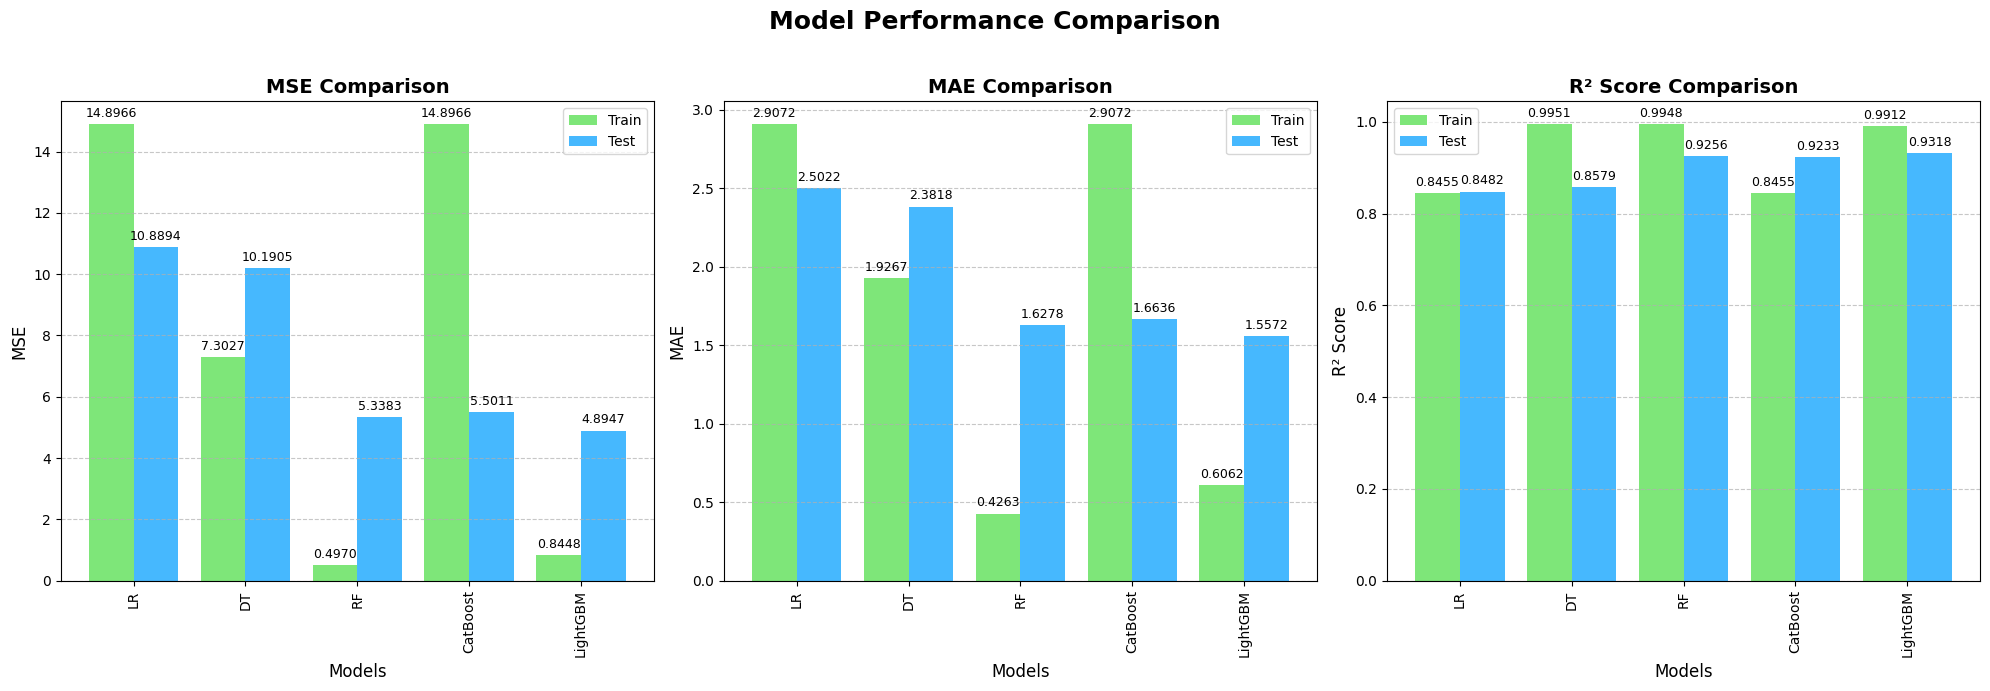

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare the data
models = ['LR','DT', 'RF','CatBoost', 'LightGBM']
metrics = [
    [14.8966, 10.8894, 2.9072, 2.5022, 0.8455, 0.8482],
    [7.3027, 10.1905, 1.9267, 2.3818, 0.9951, 0.8579],
    [0.497, 5.3383, 0.4263, 1.6278, 0.9948, 0.9256],
    [14.8966, 5.5011, 2.9072, 1.6636, 0.8455, 0.9233],
    [0.8448, 4.8947, 0.6062, 1.5572, 0.9912, 0.9318]
]

# Create DataFrame
df = pd.DataFrame(metrics, 
                  columns=['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R²', 'Test R²'], 
                  index=models)

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Model Performance Comparison', fontsize=18, fontweight='bold')

# Metric names and corresponding dataframe columns
metric_names = ['MSE', 'MAE', 'R² Score']
metric_columns = [
    ['Train MSE', 'Test MSE'],
    ['Train MAE', 'Test MAE'],
    ['Train R²', 'Test R²']
]

# Colors for Train & Test
colors = ['#7ee679', '#46b8fe']  # Green for Train, Blue for Test

# Loop through each metric subplot
for i, (metric_name, cols) in enumerate(zip(metric_names, metric_columns)):
    # Bar plot
    df[cols].plot(kind='bar', ax=axes[i], width=0.8, 
                  color=colors, linewidth=1)
    
    # Title & labels
    axes[i].set_title(f'{metric_name} Comparison', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Models', fontsize=12)
    axes[i].set_ylabel(metric_name, fontsize=12)
    axes[i].legend(['Train', 'Test'], fontsize=10)
    
    # Add grid lines
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Dashed grid for better readability
    
    # Add value labels
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.4f', padding=3, fontsize=9)

# Adjust layout & display
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevents title overlap
plt.show()


### Residuals

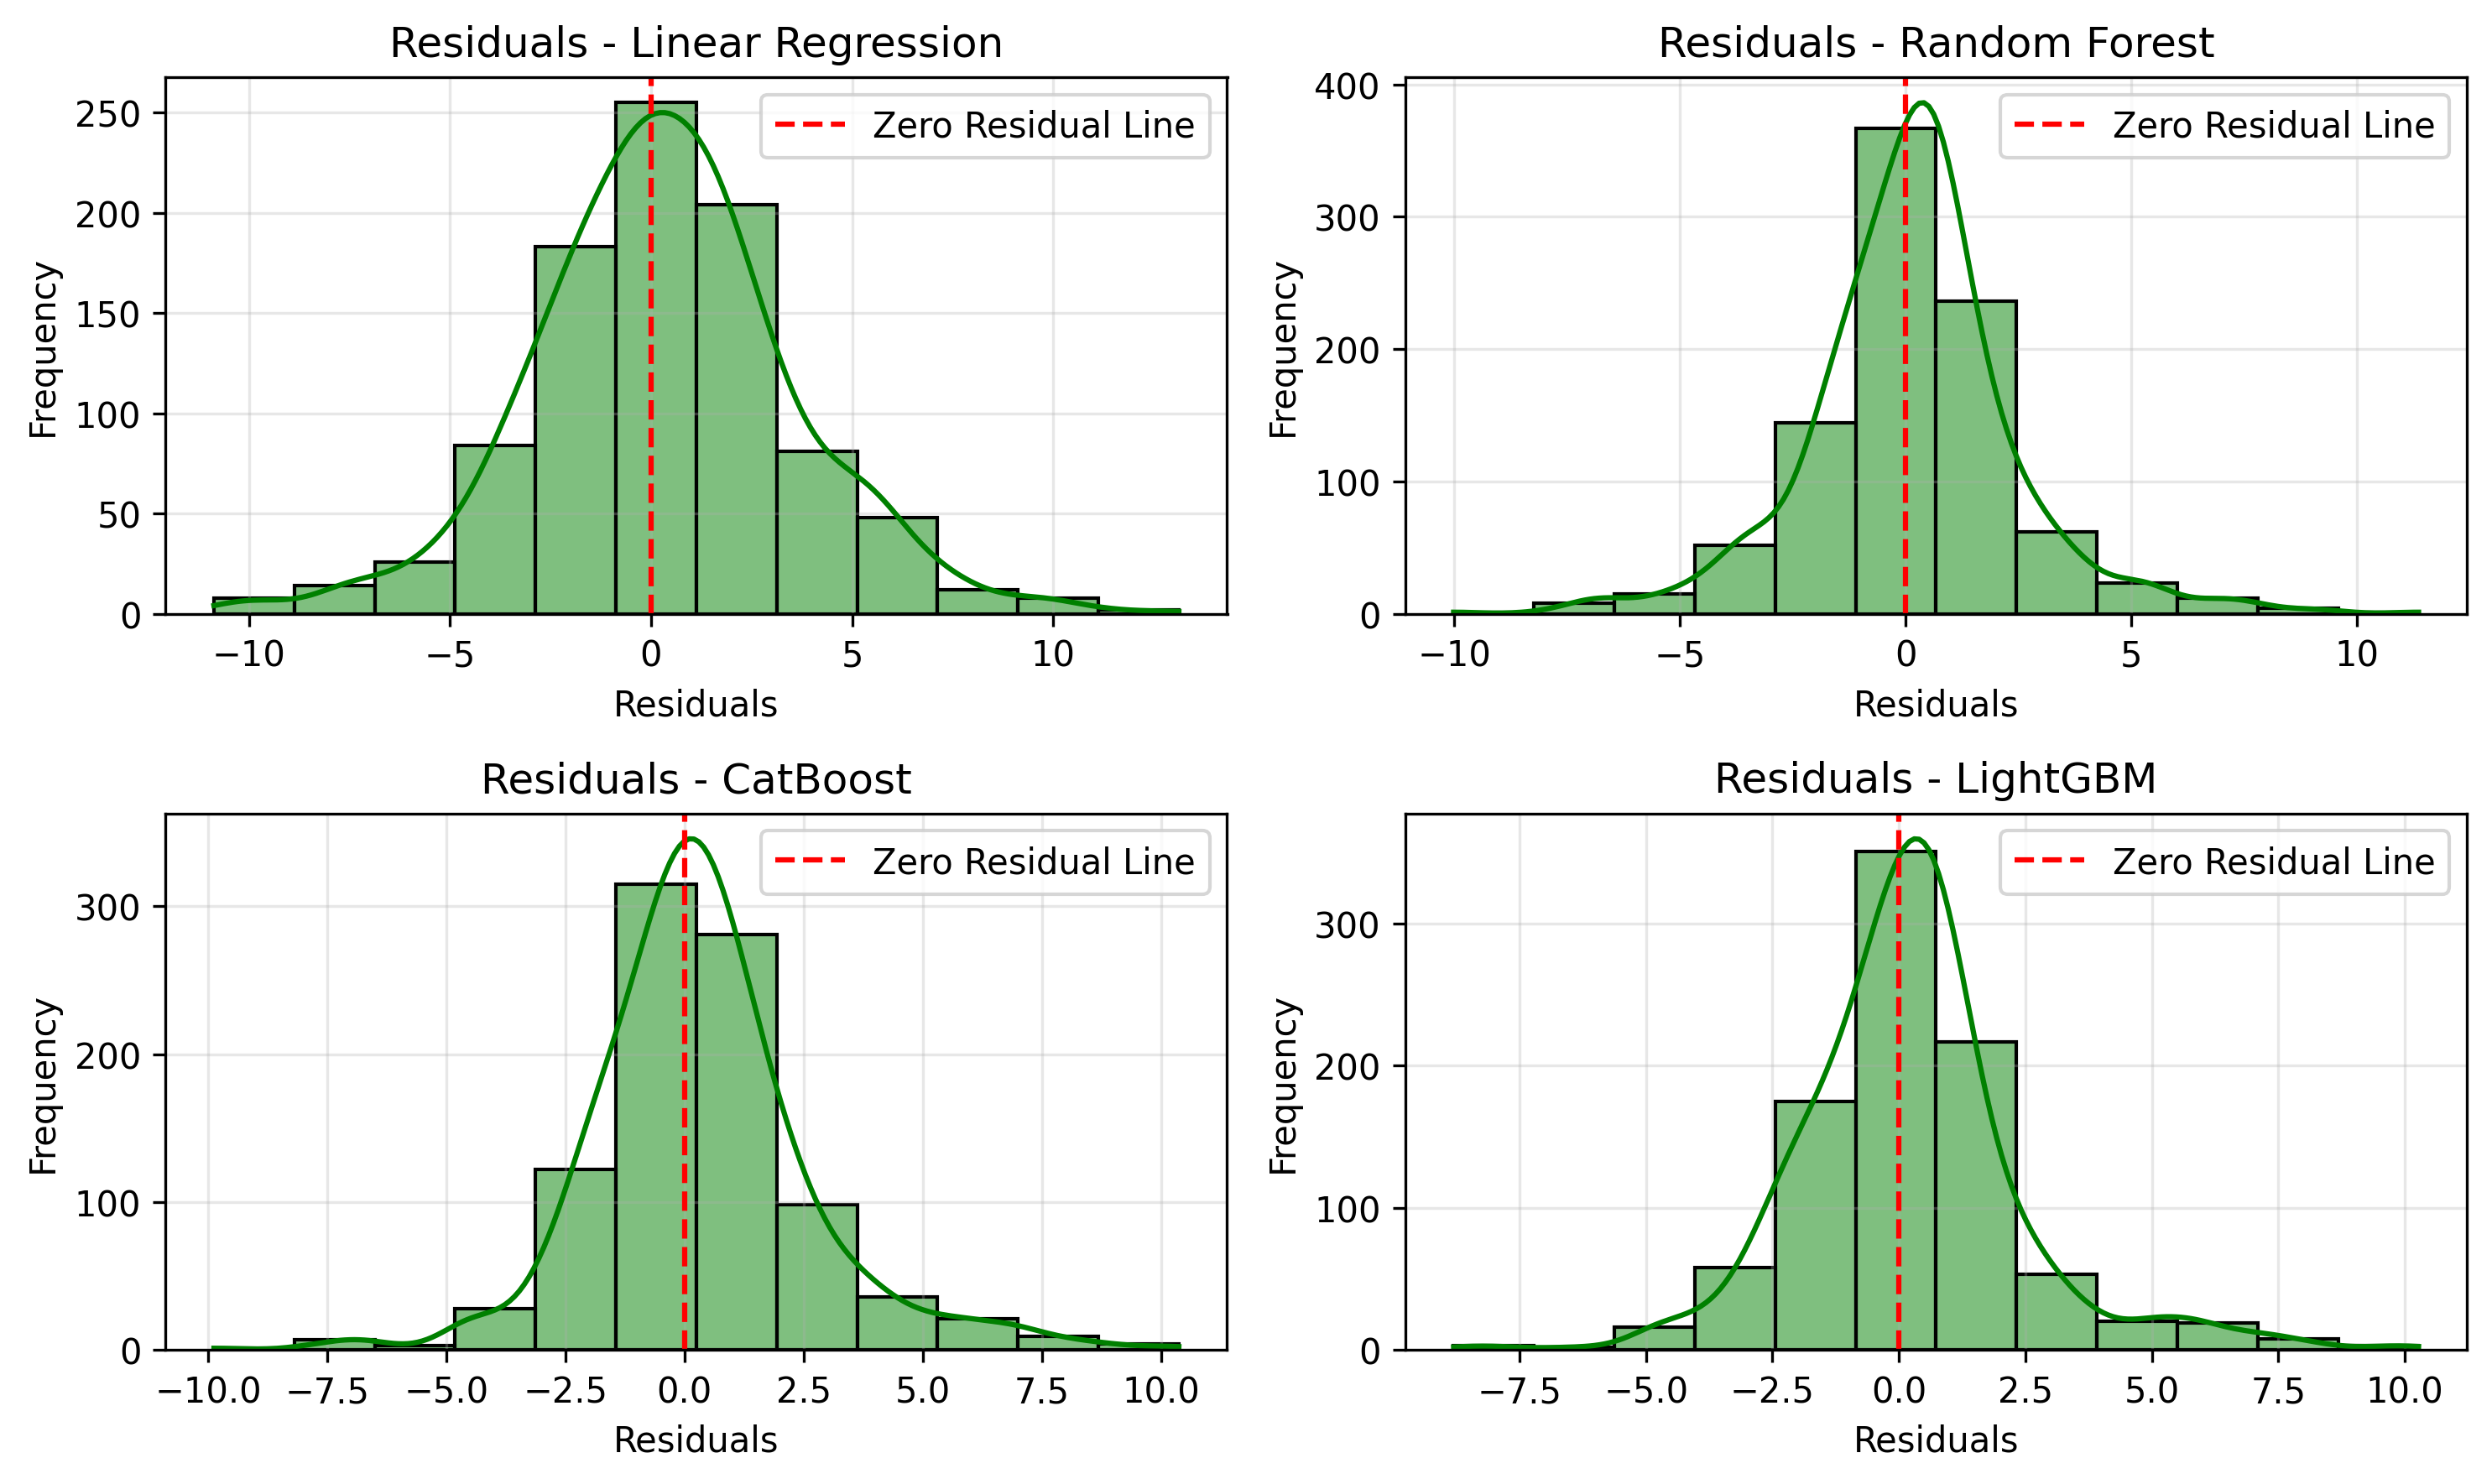

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residual1 = y_test - y_pred_test_lr
redisual2 = y_test - y_pred_test_rf
residual3 = y_test - y_pred_test_cb
residual4 = y_test - y_pred_test_lgb

residuals = [residual1, redisual2, residual3, residual4]
titles = ["Residuals - Linear Regression", "Residuals - Random Forest", "Residuals - CatBoost", "Residuals - LightGBM"]

# Create figure
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=300)

# Flatten axes for easy indexing
ax = ax.flatten()

# Plot residual histograms
for i in range(len(residuals)):
    sns.histplot(residuals[i], bins=12, kde=True, color='green', ax=ax[i])
    ax[i].set_title(titles[i], fontsize=12)
    ax[i].axvline(x=0, color='red', linestyle='dashed', label='Zero Residual Line')
    ax[i].grid(alpha=0.3)
    ax[i].set_xlabel("Residuals", fontsize=10)
    ax[i].set_ylabel("Frequency", fontsize=10)
    ax[i].legend()

# Hide the fourth (empty) subplot
for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])

# Show the final plot
plt.tight_layout()
plt.show()


- Residuals are symetrically distributed meaning there is low bias in the predictions

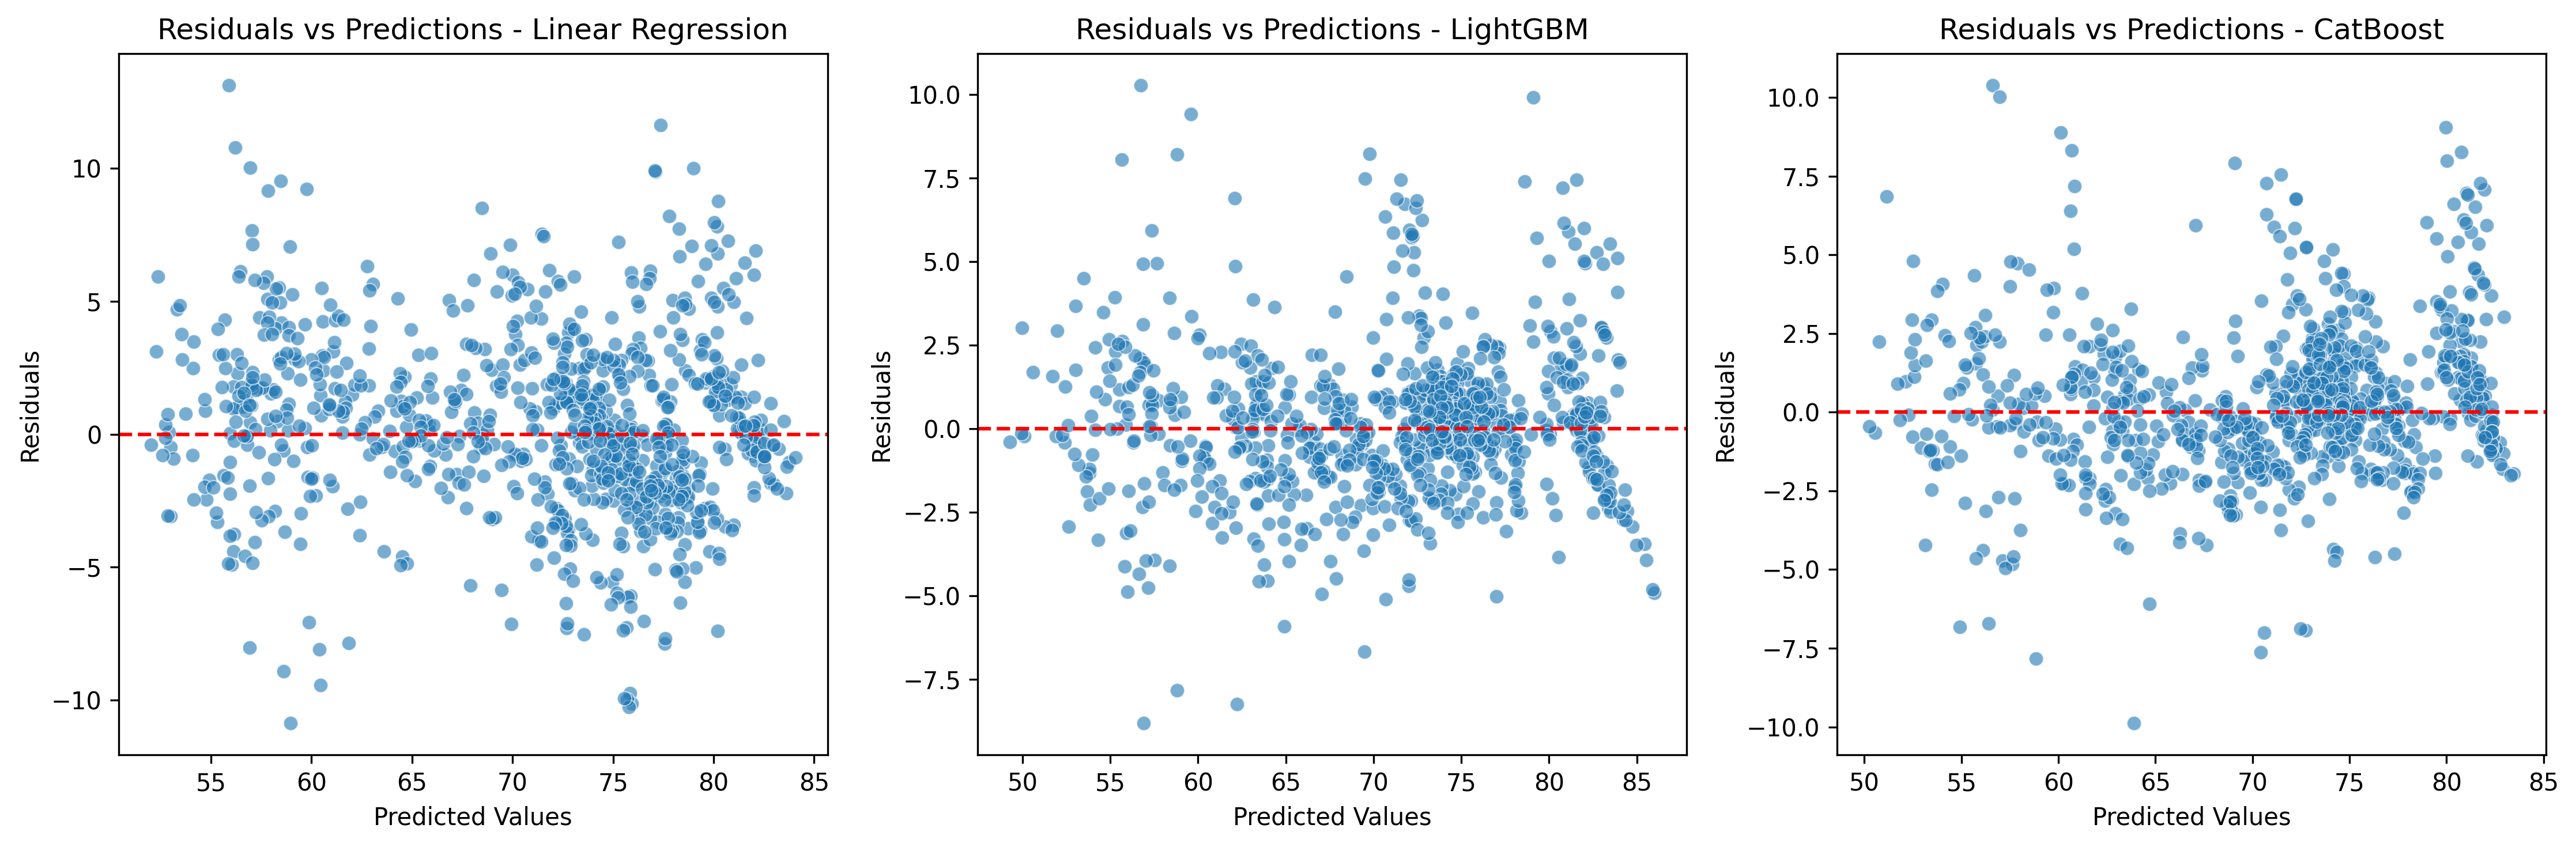

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of residuals vs. predicted values for each model
fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

models = ["Linear Regression", "LightGBM", "CatBoost"]
predictions = [y_pred_test_lr, y_pred_test_lgb, y_pred_test_cb]
residuals = [y_test - pred for pred in predictions]

for i in range(3):
    sns.scatterplot(x=predictions[i], y=residuals[i], ax=ax[i], alpha=0.6)
    ax[i].axhline(y=0, color='red', linestyle='dashed')  # Zero residual reference line
    ax[i].set_title(f"Residuals vs Predictions - {models[i]}")
    ax[i].set_xlabel("Predicted Values")
    ax[i].set_ylabel("Residuals")

plt.tight_layout()
plt.show()


In [122]:
import joblib

# Assuming 'best_model' is the best one you identified
joblib.dump(rf, "/home/davidkibet/Desktop/Life Expectancy ML/models/rf_model.pkl") 
joblib.dump(model_LGB, "/home/davidkibet/Desktop/Life Expectancy ML/models/LGB_model.pkl") 

# Save training and test sets
joblib.dump(X_train, "/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/X_train.pkl")
joblib.dump(X_test, "/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/X_test.pkl")
joblib.dump(y_train, "/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/y_train.pkl")
joblib.dump(y_test, "/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/y_test.pkl")

['/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/y_test.pkl']